In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [73]:
from proj1_helpers import *
from implementations import *

In [74]:
labels, features, ids = load_csv_data('train.csv') 

In [75]:
train = pd.read_csv('train.csv', index_col = 0)
train.head(8)

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Id,,,,,,,,,,,,,,,,,,,,,
100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
100001,b,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
100002,b,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
100003,b,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
100004,b,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
100005,b,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
100007,s,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,...,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638


In [76]:
train['Prediction'] = train['Prediction'].replace({'s': 1, 'b': -1})


In [77]:
#idx = train[train['PRI_jet_all_pt'] == 0].index
#train = train.drop(idx)


In [78]:
feature_selected = train.drop(columns = ['DER_deltaeta_jet_jet', 
                                         'DER_lep_eta_centrality', 
                                         'DER_prodeta_jet_jet', 
                                         'PRI_jet_leading_eta', 
                                         'DER_mass_jet_jet', 
                                         'PRI_jet_leading_phi',
                                         'PRI_jet_num',
                                        'PRI_jet_subleading_eta',
                                        'PRI_jet_subleading_phi',
                                        'PRI_jet_subleading_pt',
                                        'PRI_lep_eta',
                                        'PRI_lep_phi',
                                        'PRI_met_phi',
                                        'PRI_tau_eta',
                                        'PRI_tau_phi',
                                        'PRI_jet_all_pt',
                                        'PRI_jet_leading_pt'])
                                         
                                         
                                         

In [79]:
feature_selected.count()

Prediction                     250000
DER_mass_MMC                   250000
DER_mass_transverse_met_lep    250000
DER_mass_vis                   250000
DER_pt_h                       250000
DER_deltar_tau_lep             250000
DER_pt_tot                     250000
DER_sum_pt                     250000
DER_pt_ratio_lep_tau           250000
DER_met_phi_centrality         250000
PRI_tau_pt                     250000
PRI_lep_pt                     250000
PRI_met                        250000
PRI_met_sumet                  250000
dtype: int64

In [80]:
median_mass_MMC = np.median(feature_selected.DER_mass_MMC[feature_selected.DER_mass_MMC != -999])

In [81]:
feature_selected['DER_mass_MMC'] = feature_selected['DER_mass_MMC'].replace({-999: median_mass_MMC})

In [82]:
#feature_selected.to_excel('/Users/wentao/Desktop/ML Project 1/feature_selected.xlsx')

In [83]:
feature_selected.describe()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_lep_pt,PRI_met,PRI_met_sumet
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-0.314664,120.417434,49.239819,81.181982,57.895962,2.373100,18.917332,158.432217,1.437609,-0.128305,38.707419,46.660207,41.717235,209.797178
std,0.949205,52.859218,35.344886,40.828691,63.655682,0.782911,22.273494,115.706115,0.844743,1.193585,22.412081,22.064922,32.894693,126.499506
min,-1.000000,9.044000,0.000000,6.329000,0.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,20.000000,26.000000,0.109000,13.678000
25%,-1.000000,95.665000,19.241000,59.388750,14.068750,1.810000,2.841000,77.550000,0.883000,-1.371000,24.591750,32.375000,21.398000,123.017500
50%,-1.000000,112.406000,46.524000,73.752000,38.467500,2.491500,12.315500,120.664500,1.280000,-0.356000,31.804000,40.516000,34.802000,179.739000
75%,1.000000,130.606250,73.598000,92.259000,79.169000,2.961000,27.591000,200.478250,1.777000,1.225000,45.017000,53.390000,51.895000,263.379250
max,1.000000,1192.026000,690.075000,1349.351000,2834.999000,5.684000,2834.999000,1852.462000,19.773000,1.414000,764.408000,560.271000,2842.617000,2003.976000


In [84]:
corr_coef = feature_selected.drop(columns='Prediction').corr(method = 'pearson')
corr_coef

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_lep_pt,PRI_met,PRI_met_sumet
DER_mass_MMC,1.000000,0.146156,0.805154,0.035232,0.458074,0.015142,0.129819,0.064216,0.041740,0.255751,0.321339,0.075356,0.096363
DER_mass_transverse_met_lep,0.146156,1.000000,0.190109,-0.249116,0.043251,0.017758,-0.146837,0.349504,-0.419757,-0.145464,0.310648,0.183716,-0.167811
DER_mass_vis,0.805154,0.190109,1.000000,-0.062562,0.579712,-0.000702,0.088685,0.097490,-0.090846,0.290011,0.405482,-0.087330,0.053300
DER_pt_h,0.035232,-0.249116,-0.062562,1.000000,-0.539379,0.310501,0.832733,0.089187,0.539356,0.407421,0.360939,0.679585,0.782547
DER_deltar_tau_lep,0.458074,0.043251,0.579712,-0.539379,1.000000,-0.148081,-0.432603,0.047046,-0.205441,-0.202035,-0.069957,-0.402345,-0.407002
DER_pt_tot,0.015142,0.017758,-0.000702,0.310501,-0.148081,1.000000,0.381160,0.039193,0.178448,0.095754,0.109617,0.269739,0.448925
DER_sum_pt,0.129819,-0.146837,0.088685,0.832733,-0.432603,0.381160,1.000000,0.108791,0.420679,0.485847,0.460938,0.520129,0.904481
DER_pt_ratio_lep_tau,0.064216,0.349504,0.097490,0.089187,0.047046,0.039193,0.108791,1.000000,-0.038803,-0.474633,0.701142,0.053386,0.049904
DER_met_phi_centrality,0.041740,-0.419757,-0.090846,0.539356,-0.205441,0.178448,0.420679,-0.038803,1.000000,0.140885,0.054047,0.180756,0.423363
PRI_tau_pt,0.255751,-0.145464,0.290011,0.407421,-0.202035,0.095754,0.485847,-0.474633,0.140885,1.000000,0.104553,0.176665,0.448763


In [85]:
for column in corr_coef.columns:
    temp = corr_coef[abs(corr_coef[column]) > 0.78].index.values
    if np.where(temp != column)[0].shape[0] == 0:
        continue
    print(column)
    print(temp[np.where(temp != column)])
    print('\n')


DER_mass_MMC
['DER_mass_vis']


DER_mass_vis
['DER_mass_MMC']


DER_pt_h
['DER_sum_pt' 'PRI_met_sumet']


DER_sum_pt
['DER_pt_h' 'PRI_met_sumet']


PRI_met_sumet
['DER_pt_h' 'DER_sum_pt']




In [100]:
feature_0 = train[train['PRI_jet_num'] == 0]
feature_1 = train[train['PRI_jet_num'] == 1]
feature_2 = train[train['PRI_jet_num'] == 2]
feature_3 = train[train['PRI_jet_num'] == 3]

In [111]:
feature_0.head()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Id,,,,,,,,,,,,,,,,,,,,,
100003,-1,143.905,81.417,80.943,0.414,-999.0,-999.0,-999.0,3.310,0.414,...,0.060,86.062,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
100004,-1,175.864,16.915,134.805,16.405,-999.0,-999.0,-999.0,3.891,16.405,...,-0.871,53.131,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
100008,-1,105.594,50.559,100.989,4.288,-999.0,-999.0,-999.0,2.904,4.288,...,0.024,129.804,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
100010,-1,-999.000,86.240,79.692,27.201,-999.0,-999.0,-999.0,2.338,27.201,...,0.688,250.178,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
100013,-1,82.488,31.663,64.128,8.232,-999.0,-999.0,-999.0,2.823,8.232,...,1.433,163.420,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0


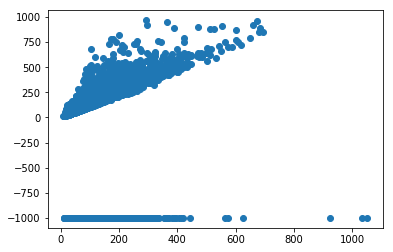

## Logistic Regression

In [90]:
X = feature_selected.drop(columns='Prediction')
y = feature_selected['Prediction']

clf = LogisticRegressionCV(max_iter = 1000, cv = 4,n_jobs = -1, verbose=1).fit(X, y)


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   30.9s finished


In [91]:
clf.score(X, y)

0.739268

In [ ]:
test = pd.read_csv('test.csv', index_col= 0)

In [ ]:
test_selected = test.drop(columns = ['DER_deltaeta_jet_jet', 
                                         'DER_lep_eta_centrality', 
                                         'DER_prodeta_jet_jet', 
                                         'PRI_jet_leading_eta', 
                                         'DER_mass_jet_jet', 
                                         'PRI_jet_leading_phi',
                                         'PRI_jet_num',
                                        'PRI_jet_subleading_eta',
                                        'PRI_jet_subleading_phi',
                                        'PRI_jet_subleading_pt',
                                        'PRI_lep_eta',
                                        'PRI_lep_phi',
                                        'PRI_met_phi',
                                        'PRI_tau_eta',
                                        'PRI_tau_phi',
                                        'PRI_jet_all_pt',
                                        'PRI_jet_leading_pt'])
median_mass_MMC = np.median(test.DER_mass_MMC[test.DER_mass_MMC != -999])
test['DER_mass_MMC'] = test['DER_mass_MMC'].replace({-999: median_mass_MMC})

In [ ]:
predict_label = clf.predict(test_selected.drop(columns='Prediction'))

In [ ]:
sub = pd.read_csv('sample-submission.csv', index_col=0)

In [57]:
sub.Prediction = predict_label

In [58]:
pd.DataFrame.to_csv(sub, 'sub.csv')